In [4]:
import cx_Oracle
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import rc
rc("font", family = "Malgun Gothic")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import mean_squared_error, mean_squared_log_error 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
pd.set_option("display.max_columns", None)


import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_rmsle(model):
    pred = model.predict(X_test)
    pred = np.expm1(pred)  # 로그 역변환 (inverse log transformation)
    y_test_exp = np.expm1(y_test)  # 로그 역변환 (inverse log transformation)
    rmsle = np.sqrt(mean_squared_log_error(y_test_exp, pred))
    print(f"{model.__class__.__name__} RMSLE: {np.round(rmsle, 3)}")
    return rmsle

def get_rmsles(models):
    rmsles = []
    for model in models:
        rmsle = get_rmsle(model)
        rmsles.append(rmsle)
    return rmsles

In [4]:
def compare_arrays(arr1, arr2):
    count = 0
    for i in range(len(arr1)):
        if arr1[i] == arr2[i]:
            count += 1
    return count

def convert_values(arr):
    result = []
    for value in arr:
        if value < 85:
            result.append(3)
        elif value < 115:
            result.append(2)
        else:
            result.append(1)
    return result

def get_scores(arr1, arr2):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(arr1)):
        if arr2[i] == 3 and arr1[i] == 3:
            TP += 1
        elif arr2[i] == 3 and arr1[i] != 3:
            FN += 1
        elif arr2[i] != 3 and arr1[i] != 3:
            TN += 1
        else:
            FP += 1
    print(f"[{TP}   {FP}]\n[{FN}   {TN}]")
    print(f"정밀도 : {round(TP/ (FP+TP)*100,2)}%")
    print(f"재현율 : {round(TP/ (FN+TP)*100,2)}%")
    print(f"정확도 : {round((TP+TN)/len(arr1)*100,2)}%")
    
def convert(x):
    cat = ''
    if x < 90 : cat = 3
    elif x < 110 : cat = 2
    else : cat = 1
    
    return cat

def convert2(x):
    cat = ''
    if x == 3 : cat = 1
    else : cat = 0
    
    return cat    

In [7]:
traindata = pd.read_pickle('../dataset/classtrain.pkl')
testdata = pd.read_pickle('../dataset/classtest.pkl')
traindata = traindata[traindata["선호제휴점포"].isin(traindata["선호제휴점포"].value_counts().index[traindata["선호제휴점포"].value_counts() > 30])]
testdata = testdata[testdata["선호제휴점포"].isin(testdata["선호제휴점포"].value_counts().index[testdata["선호제휴점포"].value_counts() > 30])]

In [8]:
traindata["Label"] = traindata["Label"].apply(lambda x : convert(x))
testdata["Label"] = testdata["Label"].apply(lambda x : convert(x))
traindata["Label"] = traindata["Label"].apply(lambda x : convert2(x))
testdata["Label"] = testdata["Label"].apply(lambda x : convert2(x))

In [9]:
train_ohe = pd.get_dummies(traindata)
test_ohe = pd.get_dummies(testdata)

In [12]:
y_train = train_ohe['Label']
y_test = test_ohe['Label']

X_train = train_ohe.drop(['Label'],axis=1)
X_test = test_ohe.drop(['Label'],axis=1)

In [14]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

print(round(accuracy_score(y_test, dt_pred),2))
print(round(accuracy_score(y_test, rf_pred),2))

0.57
0.63


In [16]:
pd.set_option("display.max_columns", None)
traindata.head(3)

,성별,연령대,거주지역,선호제휴점포,14_1F,14_2F,14_3F,14_4F,15_1F,15_2F,가공변화율,가공순증감률,신선변화율,신선순증감률,일상변화율,일상순증감률,의약변화율,의약순증감률,교육변화율,교육순증감률,디지털변화율,디지털순증감률,가구변화율,가구순증감률,의류변화율,의류순증감률,전문스포츠변화율,전문스포츠순증감률,패션변화율,패션순증감률,명품변화율,명품순증감률,기타변화율,기타순증감률,종합변화율,종합순증감률,R rank,F rank,M rank,Label
0,F,노년층,부산,A29,99.0,111.0,198.0,141.0,107.0,152.0,10,2,1,-1,9,-1,1,-1,3,-1,0,0,7,1,7,1,3,-1,11,-3,3,-1,15,1,0,0,9,4,8,1
1,F,노년층,서울,A2,111.0,70.0,129.0,126.0,153.0,173.0,13,1,7,1,16,0,3,-3,0,0,5,1,4,0,7,3,4,0,0,0,1,-1,15,1,4,0,5,4,10,0
2,F,노년층,서울,B7,270.0,193.0,273.0,273.0,210.0,312.0,7,1,9,-3,14,2,1,-1,2,0,0,0,2,0,5,-3,5,1,8,-2,1,-1,9,-1,7,1,1,8,5,0


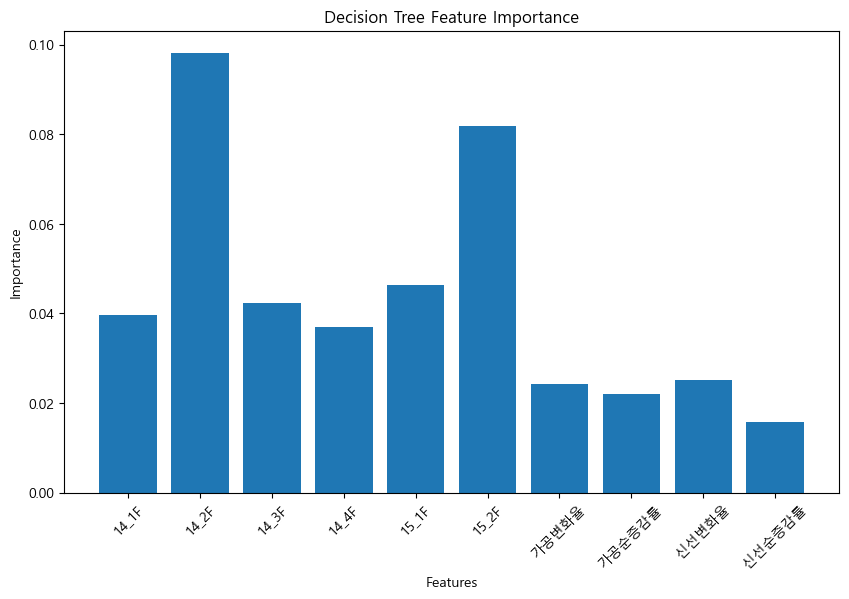

In [20]:
feature_importance_dt = dt.feature_importances_[:10]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_dt)), feature_importance_dt)
plt.xticks(range(len(feature_importance_dt)), X_train.columns[:len(feature_importance_dt)], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

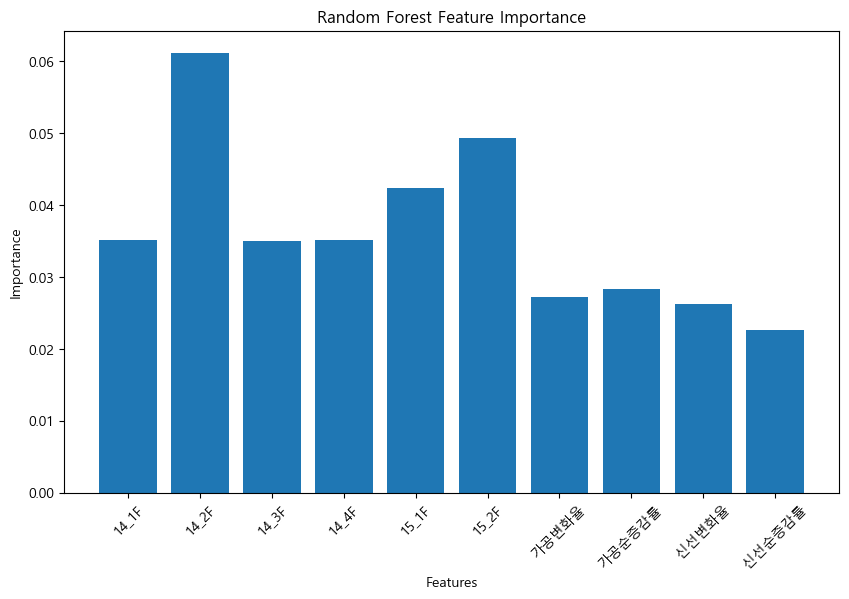

In [21]:
feature_importance_rf = rf.feature_importances_[:10]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_rf)), feature_importance_rf)
plt.xticks(range(len(feature_importance_rf)), X_train.columns[:10], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [27]:
from sklearn.datasets import load_iris
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = 156)

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=156)

In [28]:
from sklearn.metrics import accuracy_score, classification_report


pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
creport = classification_report(y_test, pred)

print(f'결정트리예측 정확도:{accuracy:.4f}','\n')
print(f'classification report:\n{creport}')

결정트리예측 정확도:0.6113 

classification report:
              precision    recall  f1-score   support

           0       0.64      0.83      0.72      8918
           1       0.50      0.27      0.35      5686

    accuracy                           0.61     14604
   macro avg       0.57      0.55      0.54     14604
weighted avg       0.59      0.61      0.58     14604



In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
tree.plot_tree(dt_clf, filled=True, feature_names=X_train.columns.astype(), class_names=dt_clf.classes_, rounded=True, fontsize=14)
plt.show()
plt.close()

In [32]:
# 짱인혁
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [6]:
import pandas as pd

train = pd.read_pickle('../dataset/train.pkl')
test = pd.read_pickle('../dataset/test.pkl')

In [7]:
train.head(3)

,성별,연령대분류,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,...,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,LABEL
0,M,노년층,-3,1,-7,0,0,0,1,0,...,19,0,20,12,24,4,3,4,10,0
1,M,노년층,-9,-1,0,9,0,-9,-9,0,...,25,4,3,5,18,12,1,4,10,0
2,M,노년층,0,0,0,0,0,0,0,0,...,0,6,0,0,0,2,6,5,1,1


In [8]:
test.head(3)

,성별,연령대분류,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,...,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,LABEL
0,M,노년층,-5,-6,-7,0,0,9,0,0,...,20,0,11,18,32,3,1,4,10,0
1,M,노년층,-2,0,0,0,0,0,1,1,...,33,5,4,6,18,19,4,4,10,1
2,M,노년층,-1,0,1,0,0,0,0,-3,...,0,3,0,0,0,3,1,5,1,0


In [22]:
train_ohe = pd.get_dummies(train)
test_ohe = pd.get_dummies(test)

In [23]:
y_train = train_ohe['LABEL']
X_train = train_ohe.drop('LABEL', axis=1)

In [24]:
y_test = test_ohe['LABEL']
X_test = test_ohe.drop('LABEL', axis=1)

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

print(round(accuracy_score(y_test, dt_pred),2))
print(round(accuracy_score(y_test, rf_pred),2))

0.75
0.83


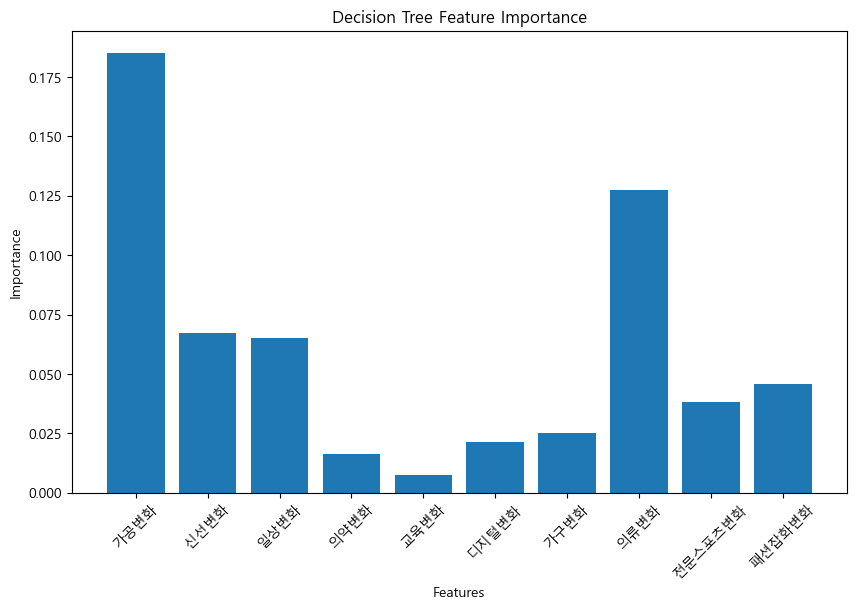

In [33]:
feature_importance_dt = dt.feature_importances_[:10]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_dt)), feature_importance_dt)
plt.xticks(range(len(feature_importance_dt)), X_train.columns[:10], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [36]:
a = train[['가공변화','LABEL']]
a

,가공변화,LABEL
0,-3,0
1,-9,0
2,0,1
3,2,1
4,-2,0
...,...,...
19378,0,1
19379,0,1
19380,5,1
19381,4,1


In [ ]:
# 파이차트 가공변화 음수 양수 레이블 비중

# count = cd['감소고객'].value_counts()
# index = count.index
# value = count
# print(index)
# print(value)

# plt.pie(value,labels=['증가','감소'],autopct='%1.1f%%')

In [57]:
def aa(num):
    cat=''
    if num < 0 : cat ='음수'
    elif num == 0 : cat ='0'
    else: cat ='양수'
    return cat

a['cate'] = a['가공변화'].apply(lambda x : aa(x))
a

C:\Users\hh\AppData\Local\Temp\ipykernel_16768\4223079628.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['cate'] = a['가공변화'].apply(lambda x : aa(x))


,가공변화,LABEL,cate
0,-3,0,음수
1,-9,0,음수
2,0,1,0
3,2,1,양수
4,-2,0,음수
...,...,...,...
19378,0,1,0
19379,0,1,0
19380,5,1,양수
19381,4,1,양수


In [60]:
print(index)
print(value)

Index(['양수', '음수', '0'], dtype='object')
양수    9196
음수    6275
0     3912
Name: cate, dtype: int64


Text(0.5, 1.0, '가공변화 레이블 비중')

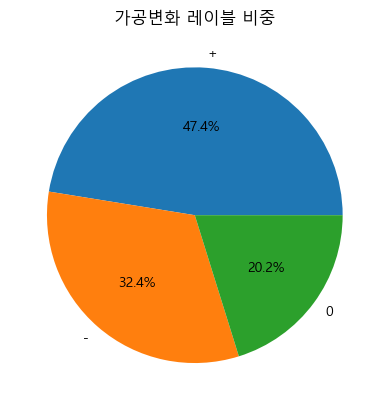

In [59]:
count = a['cate'].value_counts()
index = count.index
value = count

plt.pie(value,autopct='%1.1f%%',labels=['+','-','0'])
plt.title('가공변화 레이블 비중')
# c=양수 a=음수 b=0

음수    4377
양수    1973
0     1771
Name: cate, dtype: int64


Text(0.5, 1.0, '가공변화 레이블 0 비중')

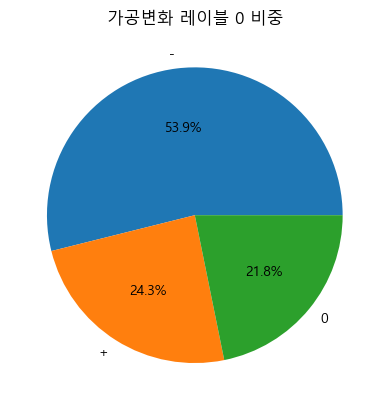

In [77]:
count = a[a['LABEL']==0]['cate'].value_counts()
index = count.index
value = count

print(value)
plt.pie(value,autopct='%1.1f%%',labels=['-','+','0'])#labels=['+','-','0']
plt.title('가공변화 레이블 0 비중')

양수    7223
0     2141
음수    1898
Name: cate, dtype: int64


Text(0.5, 1.0, '가공변화 레이블 1 비중')

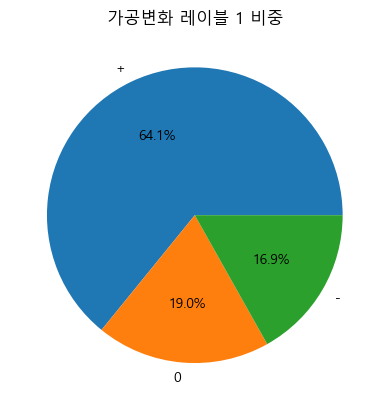

In [76]:
count = a[a['LABEL']==1]['cate'].value_counts()
index = count.index
value = count

print(value)
plt.pie(value,autopct='%1.1f%%',labels=['+','0','-'])#
plt.title('가공변화 레이블 1 비중')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')

cat_features = ['가공변화', '신선변화', '일상변화', '의약변화', '교육변화', 
                '디지털변화', '가구변화', '의류변화', '전문스포츠변화', '패션잡화변화', 
                '명품변화', '기타변화']

num_plots = len(cat_features)
num_rows = (num_plots - 1) // 4 + 1  # 3행으로 변경
ncols = 4  # 4열로 변경

fig, axs = plt.subplots(figsize=(16, 4 * num_rows), ncols=ncols, nrows=num_rows)

for i, feature in enumerate(cat_features):
    row = i // ncols
    col = i % ncols
    sns.barplot(x=train_df[feature].value_counts().index, y=train_df[feature].value_counts().values, ax=axs[row][col])
    axs[row][col].set_title(feature)

plt.tight_layout()
plt.show()

In [81]:
a = train[['의류변화','LABEL']]

def aa(num):
    cat=''
    if num < 0 : cat ='음수'
    elif num == 0 : cat ='0'
    else: cat ='양수'
    return cat

a['cate'] = a['의류변화'].apply(lambda x : aa(x))
a

C:\Users\hh\AppData\Local\Temp\ipykernel_16768\3805129030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['cate'] = a['의류변화'].apply(lambda x : aa(x))


,의류변화,LABEL,cate
0,0,0,0
1,0,0,0
2,0,1,0
3,3,1,양수
4,-4,0,음수
...,...,...,...
19378,5,1,양수
19379,0,1,0
19380,3,1,양수
19381,0,1,0


양수    7462
음수    6142
0     5779
Name: cate, dtype: int64


Text(0.5, 1.0, '의류변화 레이블 비중')

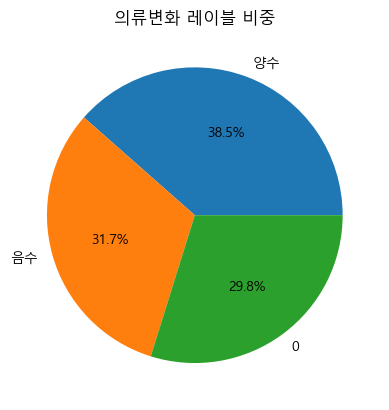

In [86]:
count = a['cate'].value_counts()
index = count.index
value = count

print(value)
plt.pie(value,autopct='%1.1f%%',labels=['양수','음수','0'])
plt.title('의류변화 레이블 비중')
# c=양수 a=음수 b=0


음수    4053
0     2407
양수    1661
Name: cate, dtype: int64


Text(0.5, 1.0, '의류변화 레이블 0 비중')

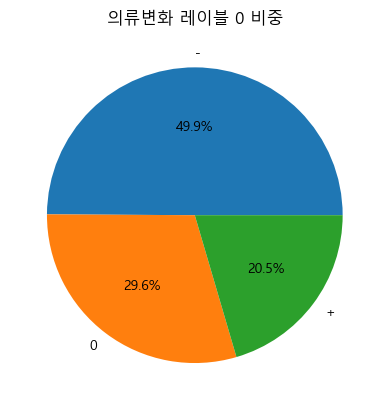

In [87]:
count = a[a['LABEL']==0]['cate'].value_counts()
index = count.index
value = count

print(value)
plt.pie(value,autopct='%1.1f%%',labels=['-','0','+'])#labels=['+','-','0']
plt.title('의류변화 레이블 0 비중')

양수    5801
0     3372
음수    2089
Name: cate, dtype: int64


Text(0.5, 1.0, '의류변화 레이블 1 비중')

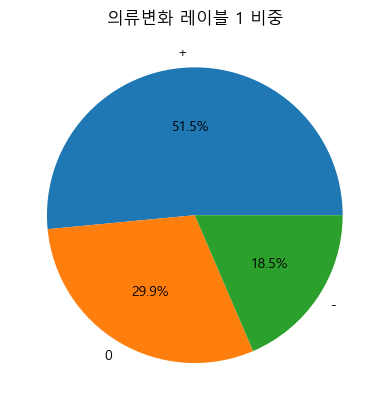

In [84]:
count = a[a['LABEL']==1]['cate'].value_counts()
index = count.index
value = count

print(value)
plt.pie(value,autopct='%1.1f%%',labels=['+','0','-'])#
plt.title('의류변화 레이블 1 비중')

In [ ]:
# a = train[['가공변화','LABEL']]

# def aa(num):
#     cat=''
#     if num < 0 : cat ='음수'
#     elif num == 0 : cat ='0'
#     else: cat ='양수'
#     return cat

# a['cate'] = a['가공변화'].apply(lambda x : aa(x))
# a

# count = a['cate'].value_counts()
# index = count.index
# value = count

# plt.pie(value,autopct='%1.1f%%',labels=['+','-','0'])
# plt.title('가공변화 레이블 비중')
# # c=양수 a=음수 b=0

# count = a[a['LABEL']==0]['cate'].value_counts()
# index = count.index
# value = count

# print(value)
# plt.pie(value,autopct='%1.1f%%',labels=['-','+','0'])#labels=['+','-','0']
# plt.title('가공변화 레이블 0 비중')

# count = a[a['LABEL']==1]['cate'].value_counts()
# index = count.index
# value = count

# print(value)
# plt.pie(value,autopct='%1.1f%%',labels=['+','0','-'])#
# plt.title('가공변화 레이블 1 비중')

In [98]:
a = train[train['LABEL']==1]
a.head()

,성별,연령대분류,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,...,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,LABEL
2,M,노년층,0,0,0,0,0,0,0,0,...,0,6,0,0,0,2,6,5,1,1
3,F,노년층,2,2,2,0,0,0,0,3,...,18,5,5,15,0,34,8,3,5,1
5,F,노년층,-3,-3,0,0,0,0,0,0,...,34,4,0,7,24,15,7,7,7,1
6,F,노년층,-2,0,2,8,0,0,9,0,...,15,8,12,2,18,27,4,3,9,1
7,M,노년층,0,0,0,0,0,0,0,0,...,16,6,28,14,8,8,4,8,9,1


In [100]:
a_train_ohe = pd.get_dummies(a)

In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(a_train_ohe)
a_train_ohe['cluster'] = kmeans.labels_
^_^

In [118]:
import pandas as pd
pd.set_option('display.max_columns', None)


In [128]:
train1 = pd.read_pickle('../dataset/train1.pkl') # 1-6 / 1-7 << train1
test1 = pd.read_pickle('../dataset/test1.pkl')   # 2-7 / 2-8 << test1
train2 = pd.read_pickle('../dataset/train2.pkl') # 3-8 << train2

In [129]:
train1.head(3)

,성별,연령대분류,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화,ABS가공,ABS신선,ABS일상,ABS의약,ABS교육,ABS디지털,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,CAGR,LABEL
0,M,노년층,-3,0,-7,0,0,0,0,0,-3,-6,8,0,3,14,11,14,0,18,20,0,19,12,24,4,3,4,1,-8.17,1
1,M,노년층,-9,-1,0,9,0,-9,-9,0,-1,-1,0,-9,9,1,0,9,0,27,25,4,3,5,18,13,1,4,1,-12.04,0
2,M,노년층,0,-1,0,0,0,0,0,0,0,0,0,-3,4,5,2,0,0,16,0,6,0,0,0,3,6,5,10,3.54,0


In [130]:
test1.head(3)

,성별,연령대분류,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화,ABS가공,ABS신선,ABS일상,ABS의약,ABS교육,ABS디지털,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,CAGR,LABEL
0,M,노년층,-5,-6,-7,0,0,9,0,0,-2,0,0,1,5,16,11,14,0,18,20,0,11,18,32,3,1,4,1,-10.91,1
1,M,노년층,-4,-1,0,0,0,0,2,1,0,0,0,1,12,1,0,18,0,27,32,5,4,6,18,19,4,4,1,11.55,0
2,M,노년층,-2,0,1,0,0,0,0,-3,0,0,0,-2,4,6,3,0,0,16,0,3,0,0,0,4,1,5,10,-6.03,1


In [131]:
train2.head(3)

,성별,연령대분류,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화,ABS가공,ABS신선,ABS일상,ABS의약,ABS교육,ABS디지털,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M
0,M,노년층,-6,0,-1,0,0,-7,0,-1,6,0,-8,0,6,14,17,14,0,29,20,1,12,18,24,2,4,4,1
1,M,노년층,0,0,0,0,0,-9,0,0,-1,-2,0,-9,14,2,0,18,0,45,34,4,5,8,18,25,4,4,1
2,M,노년층,-2,-3,0,0,0,-8,0,0,0,3,0,-2,4,5,4,0,0,8,0,0,0,3,0,4,3,5,10


0.66
0.73


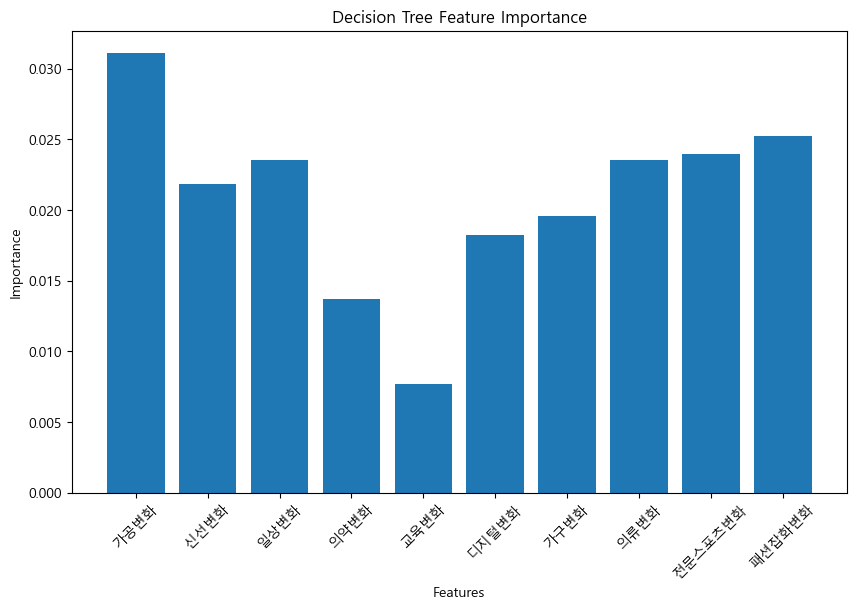

In [133]:
# 정확도 계산 & feature importance
train_ohe = pd.get_dummies(train1)
test_ohe = pd.get_dummies(test1)

y_train = train_ohe['LABEL']
X_train = train_ohe.drop('LABEL', axis=1)

y_test = test_ohe['LABEL']
X_test = test_ohe.drop('LABEL', axis=1)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

print(round(accuracy_score(y_test, dt_pred),2))
print(round(accuracy_score(y_test, rf_pred),2))

feature_importance_dt = dt.feature_importances_[:10]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_dt)), feature_importance_dt)
plt.xticks(range(len(feature_importance_dt)), X_train.columns[:10], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [6]:
cldata = pd.read_pickle('../dataset/cusclusterdata.pkl')
cldata.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,최근성,행동 빈도,구매 총액,평균구매액,최대값1,최대값2,최대값3,LABEL
0,00001,M,60세이상,060,12.0,13.0,96.0,NaN,A,12,A12,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,2,1057,85042550,80456.53,디지털,가구,기타,1
1,00002,M,60세이상,100,7.0,18.0,NaN,33.0,A,7,A7,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,2,1116,99880760,89498.89,일상,전문스포츠,디지털,1
2,00003,M,60세이상,033,1.0,9.0,34.0,NaN,C,34,C34,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0,4,1191,3165167,2657.57,신선,가공,일상,0
3,00004,F,60세이상,016,20.0,8.0,19.0,NaN,A,20,A20,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0,1,930,16693810,17950.33,기타,전문스포츠,신선,1
4,00005,M,60세이상,100,7.0,18.0,NaN,33.0,A,7,A7,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,NaN,2616260.0,4,719,13237070,18410.39,가공,가구,신선,0


In [ ]:
# 정확도 계산 & feature importance
train_ohe = pd.get_dummies(train1)
test_ohe = pd.get_dummies(test1)

y_train = train_ohe['LABEL']
X_train = train_ohe.drop('LABEL', axis=1)

y_test = test_ohe['LABEL']
X_test = test_ohe.drop('LABEL', axis=1)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

print(round(accuracy_score(y_test, dt_pred),2))
print(round(accuracy_score(y_test, rf_pred),2))

feature_importance_dt = dt.feature_importances_[:10]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_dt)), feature_importance_dt)
plt.xticks(range(len(feature_importance_dt)), X_train.columns[:10], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [37]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [38]:
df = data[['가공변화','신선변화','일상변화','의약변화','교육변화','디지털변화',
               '가구변화','의류변화','전문스포츠변화','패션잡화변화','명품변화','기타변화']]
df.head(1)

,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화
0,-6,0,-1,0,0,-7,0,-1,6,0,-8,0


In [39]:
data = pd.read_pickle('../dataset/spredictdata.pkl')
data.head(2)

,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화,ABS가공,ABS신선,ABS일상,ABS의약,ABS교육,ABS디지털,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,CAGR,LABEL
0,-6,0,-1,0,0,-7,0,-1,6,0,-8,0,6,14,17,14,0,29,20,1,12,18,24,2,4,4,1,-10.91,1
1,0,0,0,0,0,-9,0,0,-1,-2,0,-9,14,2,0,18,0,45,34,4,5,8,18,25,4,4,1,-11.55,1


In [40]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0) # kmeans 객체 만들고
kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [41]:
print(kmeans.labels_)

[1 1 2 ... 2 2 2]


In [42]:
# 시각화
from sklearn.decomposition import PCA

# 차원축소 (속성4개인데 2차원평면에 적합하지 않아 속성을 2개로 차원축소 함.)
pca = PCA(n_components=4)
pca_transformed = pca.fit_transform(df)

data['pca_1'] = pca_transformed[:,0]
data['pca_2'] = pca_transformed[:,1]
data['pca_3'] = pca_transformed[:,2]
data['pca_4'] = pca_transformed[:,3]
data.head(3)

,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화,ABS가공,ABS신선,ABS일상,ABS의약,ABS교육,ABS디지털,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,CAGR,LABEL,pca_1,pca_2,pca_3,pca_4
0,-6,0,-1,0,0,-7,0,-1,6,0,-8,0,6,14,17,14,0,29,20,1,12,18,24,2,4,4,1,-10.91,1,-4.517601,-4.006391,-5.273800,0.397964
1,0,0,0,0,0,-9,0,0,-1,-2,0,-9,14,2,0,18,0,45,34,4,5,8,18,25,4,4,1,-11.55,1,-6.288656,-6.036811,-4.100311,-2.018574
2,-2,-3,0,0,0,-8,0,0,0,3,0,-2,4,5,4,0,0,8,0,0,0,3,0,4,3,5,10,-6.03,0,-3.628700,-3.652974,-4.903679,1.789791


In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
kmeans = KMeans(n_clusters=12, init='k-means++', max_iter=300, random_state=0).fit(data)

data['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수값을 구함
score_samples = silhouette_samples(data, data['cluster'])
print('score_samples() return값의 shape:', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함
average_score = silhouette_score(data, data['cluster'])
print('silhouette analysis score:{0:.3f}'.format(average_score))

data.head(3)

score_samples() return값의 shape: (19383,)
silhouette analysis score:0.062


,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화,ABS가공,ABS신선,ABS일상,ABS의약,ABS교육,ABS디지털,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,CAGR,LABEL,pca_1,pca_2,pca_3,pca_4,cluster,silhouette_coeff
0,-6,0,-1,0,0,-7,0,-1,6,0,-8,0,6,14,17,14,0,29,20,1,12,18,24,2,4,4,1,-10.91,1,-4.517601,-4.006391,-5.273800,0.397964,7,0.082812
1,0,0,0,0,0,-9,0,0,-1,-2,0,-9,14,2,0,18,0,45,34,4,5,8,18,25,4,4,1,-11.55,1,-6.288656,-6.036811,-4.100311,-2.018574,7,0.093149
2,-2,-3,0,0,0,-8,0,0,0,3,0,-2,4,5,4,0,0,8,0,0,0,3,0,4,3,5,10,-6.03,0,-3.628700,-3.652974,-4.903679,1.789791,0,0.215781


In [53]:
data.groupby('cluster')['silhouette_coeff'].mean()

cluster
0     0.159405
1     0.083860
2     0.054454
3     0.041918
4     0.068727
5     0.078442
6     0.039340
7     0.015644
8     0.060493
9     0.035746
10    0.043796
11    0.024984
Name: silhouette_coeff, dtype: float64

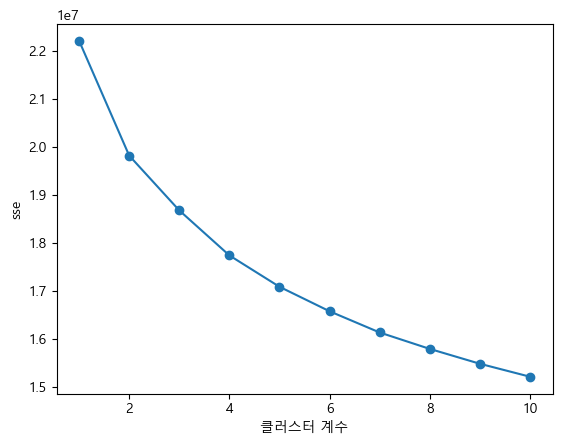

In [29]:
def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('클러스터 계수')
    plt.ylabel('sse')
    plt.show()
    
elbow(data)

In [55]:
aa = pd.read_pickle('../dataset/shclusterdata.pkl')
aa.head()

,고객번호,성별,연령대,거주지역,A구매여부,B구매여부,C구매여부,D구매여부,선호제휴사,선호제휴점포,선호상품1,선호상품2,선호상품3,R,F,M,CAGR,LABEL
0,00001,M,노년층,서울,1,1,1,0,A,A12,디지털,가구,기타,4,4,1,-10.91,1
1,00002,M,노년층,서울,1,1,0,1,A,A7,일상,전문스포츠,디지털,4,4,1,-11.55,1
2,00003,M,노년층,서울,1,1,1,0,C,C34,신선,가공,일상,3,5,10,-6.03,0
3,00004,F,노년층,서울,1,1,1,0,A,A20,기타,전문스포츠,신선,8,3,6,-9.79,1
4,00005,M,노년층,서울,1,1,0,1,A,A7,가공,가구,신선,3,2,7,8.33,0
